In [195]:
import pandas as pd
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score, roc_curve
import argparse

 # Initiate argument parser
class args:
    gt_df='/notebooks/data/datasets/pipistrel/Hackathon/SingleFrame_ObjectProposalClassification/test/labels.csv'
    detfile='./train_logs_b256_e15_sea_train_test/predictions_fm.csv'

gt_df = pd.read_csv(args.gt_df)
classT = {'nature': 0.0,'boat': 1.0}
gt_df['class'] = [classT[item] for item in gt_df['class']]

det_df = pd.read_csv(args.detfile)
det_df['filename'] = det_df['filename'].apply(lambda x: x.split('/')[-1])
# det_df = det_df[det_df['filename'].str.contains("_")]
det_df = det_df[['confidence','filename','true_labels']]

# df = pd.merge(left=gt_df, right=det_df, how='left', left_on='filename', right_on='filename', )
# df = df.dropna()
AP=average_precision_score(det_df['true_labels'], det_df['confidence'], average="macro", sample_weight=None)
print("Average precision:",str(round(AP, 2)))
roc_auc = roc_auc_score(det_df['true_labels'], det_df['confidence'], average="macro", sample_weight=None)
print("AUROC", roc_auc)
# from sklearn.metrics import accuracy_score
# print(accuracy_score(det_df['true_labels'], det_df['confidence'] > 200))

precision, recall, _ = precision_recall_curve(det_df['true_labels'], det_df['confidence'])

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = {'step': 'post'}

plt.vlines(recall[precision.argmax()], 0, 1, colors="r", label='{:.2f} recall for 1.0 precision'.format(recall[precision.argmax()]))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          AP));
plt.legend()

plt.show()

plt.figure()
lw = 2
fpr, tpr, _ = roc_curve(det_df['true_labels'], det_df['confidence'])
plt.plot(fpr, tpr, color='darkorange', lw=lw)
plt.vlines(fpr[tpr.argmax()], 0, 1, colors='r', label='{:.2f} fpr for 1.0 tpr'.format(fpr[tpr.argmax()]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC={0:0.2f}'.format(roc_auc))
plt.legend()
plt.show()

FileNotFoundError: File b'./train_logs_b256_e15_sea_train_test/predictions_fm.csv' does not exist

In [194]:
fpr[tpr.argmax()]

0.12022603273577552

In [189]:
roc_curve(det_df['true_labels'], det_df['confidence'])

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.42013553e-04,
        2.42013553e-04, 4.84027106e-04, 4.84027106e-04, 9.68054211e-04,
        9.68054211e-04, 1.21006776e-03, 1.21006776e-03, 1.93610842e-03,
        1.93610842e-03, 3.14617619e-03, 3.14617619e-03, 4.84027106e-03,
        4.84027106e-03, 1.00000000e+00]),
 array([0.        , 0.00207469, 0.97510373, 0.97510373, 0.98340249,
        0.98340249, 0.98547718, 0.98547718, 0.99170124, 0.99170124,
        0.99377593, 0.99377593, 0.99585062, 0.99585062, 0.99792531,
        0.99792531, 1.        , 1.        ]),
 array([20.13735199, 19.13735199,  6.76076698,  6.73561954,  6.3111558 ,
         6.12858677,  6.1217432 ,  6.03558207,  5.81943798,  5.72765064,
         5.7123065 ,  5.58568954,  5.54621887,  5.39221668,  5.3644743 ,
         5.26104879,  5.24541855,  0.72145098]))

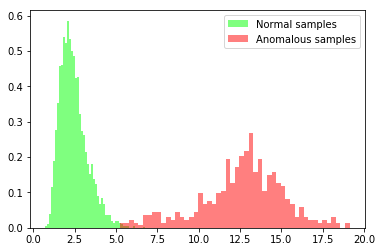

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(det_df[det_df['true_labels'] == 0.]['confidence'], 50, facecolor=(0, 1, 0, 0.5),
         label="Normal samples", density=True)
plt.hist(det_df[det_df['true_labels'] == 1.]['confidence'], 50, facecolor=(1, 0, 0, 0.5),
         label="Anomalous samples", density=True)

plt.legend()
plt.show()

In [191]:
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve

THRESHOLD = 4.5
print("F1", f1_score(det_df['true_labels'], det_df['confidence'] > THRESHOLD, average="macro", sample_weight=None))
print("PR", precision_score(det_df['true_labels'], det_df['confidence'] > THRESHOLD, average="macro", sample_weight=None))
print("RC", recall_score(det_df['true_labels'], det_df['confidence'] > THRESHOLD, average="macro", sample_weight=None))


F1 0.9537896097543934
PR 0.9242957746478873
RC 0.989593417231365


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.85')

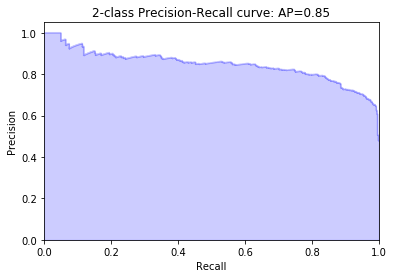

In [53]:
(df['class'] == 1 - df['true_labels']).all()

True

In [68]:
det_df[['confidence','filename','true_labels']]

,confidence,filename,true_labels
0,724.908630,10380.png,0
1,821.605103,10734.png,0
2,732.082214,11925.png,0
3,778.887939,14064.png,0
4,973.555237,13825.png,0
5,657.147705,13819.png,0
6,403.024628,12837.png,0
7,527.169250,15783.png,0
8,526.452393,13780.png,0
9,762.694946,15823.png,0


In [39]:
?pd.merge

In [37]:
detfile

NameError: name 'detfile' is not defined

In [16]:
gt_df.head()

,filename,class
0,10343.png,1.0
1,10351.png,1.0
2,10352.png,1.0
3,10354.png,1.0
4,10360.png,1.0


In [12]:
det_df

,Unnamed: 0,filename,confidence,true_label
0,0,/notebooks/data/datasets/pipistrel/Hackathon/S...,0.742816,1
1,1,/notebooks/data/datasets/pipistrel/Hackathon/S...,0.736558,1
2,2,/notebooks/data/datasets/pipistrel/Hackathon/S...,0.758083,1
3,3,/notebooks/data/datasets/pipistrel/Hackathon/S...,0.906401,0
4,4,/notebooks/data/datasets/pipistrel/Hackathon/S...,0.727911,1
5,5,/notebooks/data/datasets/pipistrel/Hackathon/S...,0.727664,1
6,6,/notebooks/data/datasets/pipistrel/Hackathon/S...,0.759697,1
7,7,/notebooks/data/datasets/pipistrel/Hackathon/S...,0.724158,1
8,8,/notebooks/data/datasets/pipistrel/Hackathon/S...,0.725123,1
9,9,/notebooks/data/datasets/pipistrel/Hackathon/S...,0.940786,0
